# 1.Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Load the Dataset

In [2]:
df = pd.read_csv("/content/diminos_data.csv")
df.head()


,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


# 3.Basic Data Inspection

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [4]:
df.describe()


,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


# 4.Convert Date-Time Columns

In [5]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])


# 5.Feature Engineering – Delivery Time

In [6]:
df['delivery_time_mins'] = (
    df['order_delivered_at'] - df['order_placed_at']
).dt.total_seconds() / 60


In [7]:
df[['delivery_time_mins']].describe()


,delivery_time_mins
count,15000.000000
mean,20.499389
std,96.160362
min,15.000010
25%,15.274826
50%,15.797986
75%,17.279661
max,7299.831375


# 6.Overall Store Performance Metrics

In [8]:
average_time = df['delivery_time_mins'].mean()
median_time = df['delivery_time_mins'].median()
p95_time = np.percentile(df['delivery_time_mins'], 95)

average_time, median_time, p95_time


(np.float64(20.499389326467778),
 15.797986066666667,
 np.float64(27.261043996666658))

# 7.SLA Breach Analysis

In [9]:
late_orders = df[df['delivery_time_mins'] > 31]

late_percentage = (len(late_orders) / len(df)) * 100
late_percentage


3.713333333333333

# 8.Outlier Detection

In [10]:
df['delivery_time_mins'].max()


7299.831374933333

# 9.Delivery Time Distribution

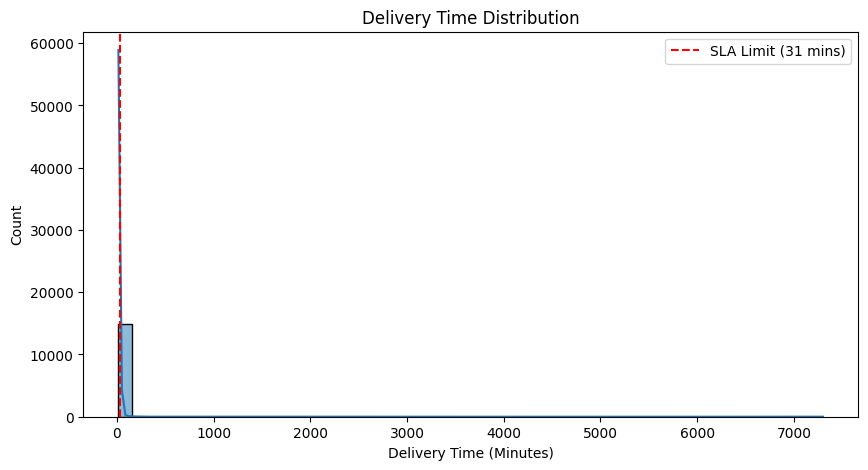

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['delivery_time_mins'], bins=50, kde=True)
plt.axvline(31, color='red', linestyle='--', label='SLA Limit (31 mins)')
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (Minutes)")
plt.legend()
plt.show()


# 10.Hour-wise Performance Analysis

In [12]:
df['order_hour'] = df['order_placed_at'].dt.hour


In [13]:
hourly_p95 = df.groupby('order_hour')['delivery_time_mins'].quantile(0.95)
hourly_p95


,delivery_time_mins
order_hour,
0,28.866990
1,32.104821
2,26.845717
3,25.617373
4,26.259762
5,23.924907
6,26.493076
7,27.154475
8,27.207707


# 11.Identify High-Risk Hours

In [14]:
risk_hours = hourly_p95[hourly_p95 > 31]
risk_hours


,delivery_time_mins
order_hour,
1,32.104821
11,33.407016
16,32.438371


# 12.Visualizing Hour-wise SLA Risk

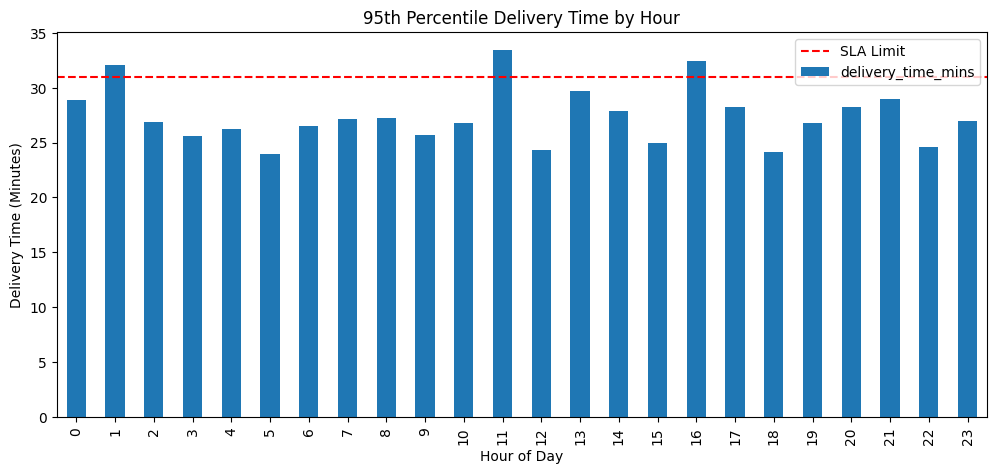

In [15]:
plt.figure(figsize=(12,5))
hourly_p95.plot(kind='bar')
plt.axhline(31, color='red', linestyle='--', label='SLA Limit')
plt.title("95th Percentile Delivery Time by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Delivery Time (Minutes)")
plt.legend()
plt.show()


# 13.Business Recommendations

1. Increase delivery staff during:
   - 11 AM – 1 PM
   - 4 PM – 6 PM

2. Add a night-shift buffer staff at 1 AM

3. Audit orders with delivery time > 60 minutes
   - Fix system / tracking issues
4. Real-time SLA alerts for orders > 25 mins
5. Peak-hour performance tracking (95th percentile only)
6. Monthly SLA dashboard for Diminos audits


# 14.Client Summary

1.   Kanav’s store currently meets Diminos SLA.
2.   Certain time slots are high risk.
3.   With small operational tweaks, franchise loss can be fully avoided.